In [ ]:
# Langkah 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Dataset Udemy.csv')

In [ ]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [ ]:
df['is_paid'].value_counts()

,count
is_paid,
True,3372
False,310


In [ ]:
df['subject'].value_counts()

,count
subject,
Web Development,1200
Business Finance,1199
Musical Instruments,680
Graphic Design,603


In [ ]:
# Langkah 2

In [ ]:
df.isnull().sum()

,0
course_id,0
course_title,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0
published_timestamp,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filter1 = (df['num_subscribers']==0) & (df['price']==0)
filter1.value_counts()

,count
False,3682


In [ ]:
data = df[~filter1]
data[(df['num_subscribers']==0) & (df['price']==0)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [ ]:
df.isnull().sum()

,0
course_id,0
course_title,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0
published_timestamp,0


In [ ]:
# Langkah 3

In [ ]:
country_wise_data = data.groupby('subject')['num_subscribers'].sum().reset_index()
country_wise_data.columns = ['subject', 'total_subscribers']


In [ ]:
import plotly.express as px

bar_chart = px.bar(
    country_wise_data,
    x='subject',
    y='total_subscribers',
    title='Total Subscriber per Kategori Kursus',
    color='total_subscribers',
    color_continuous_scale='Viridis'
)
bar_chart.show()


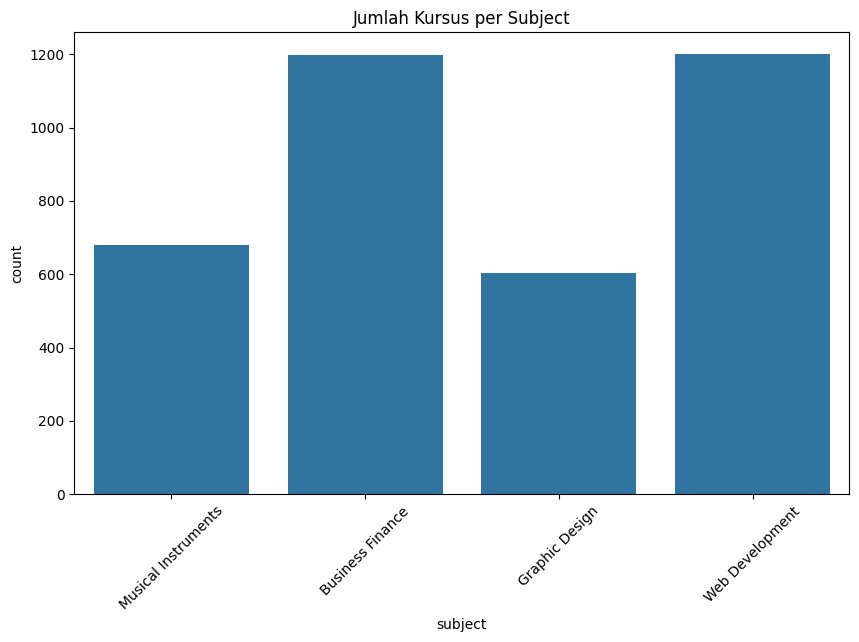

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subject')
plt.xticks(rotation=45)
plt.title('Jumlah Kursus per Subject')
plt.show()

In [ ]:
# Langkah 4

In [ ]:
data2 = data[data['num_subscribers'] > 0]

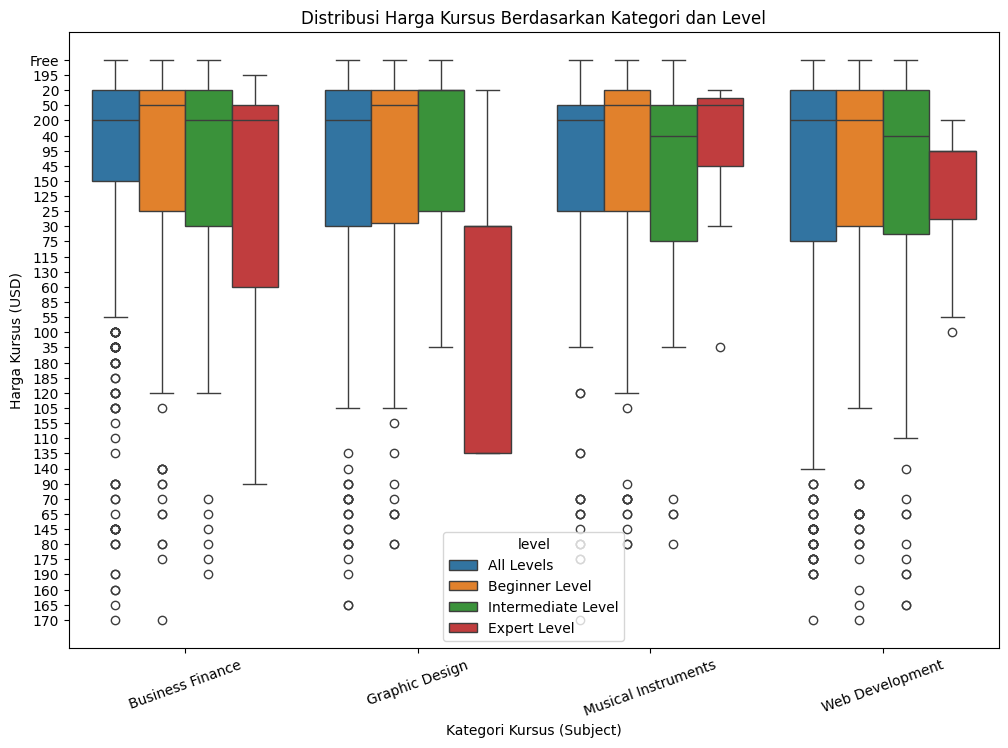

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='subject', y='price', hue='level', data=data2.sort_values('subject', ascending=True))
plt.title('Distribusi Harga Kursus Berdasarkan Kategori dan Level')
plt.xlabel('Kategori Kursus (Subject)')
plt.ylabel('Harga Kursus (USD)')
plt.xticks(rotation=20)
plt.show()


In [ ]:
# Langkah 5

In [ ]:
!pip install sort_dataframeby_monthorweek
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek
import sort_dataframeby_monthorweek as sd

In [ ]:
data_webdev = data[(data['subject'] == 'Web Development') & (data['num_subscribers'] > 0)]
data_business = data[(data['subject'] == 'Business Finance') & (data['num_subscribers'] > 0)]



In [ ]:
data2['published_timestamp'] = pd.to_datetime(data2['published_timestamp'])


In [ ]:
data2['published_month'] = data2['published_timestamp'].dt.month_name()


In [ ]:
data_webdev = data2[data2['subject'] == 'Web Development']
data_business = data2[data2['subject'] == 'Business Finance']


In [ ]:
rush_webdev = data_webdev['published_month'].value_counts().reset_index()
rush_webdev.columns = ['month', 'num_courses']

rush_business = data_business['published_month'].value_counts().reset_index()
rush_business.columns = ['month', 'num_courses']


In [ ]:
final_rush = rush_webdev.merge(rush_business, on='month')
final_rush.columns = ['month', 'num_courses_webdev', 'num_courses_business']


In [ ]:
final_rush

,month,num_courses_webdev,num_courses_business
0,November,116,86
1,June,113,117
2,February,112,112
3,March,103,123
4,January,102,102
5,September,100,75
6,October,99,80
7,July,95,85
8,May,95,117
9,April,94,100


In [ ]:
px.line(data_frame=final_rush, x='month', y=['num_courses_webdev', 'num_courses_business'])

In [ ]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['published_month'] = data['published_timestamp'].dt.month_name()


In [ ]:
# Langkah 6

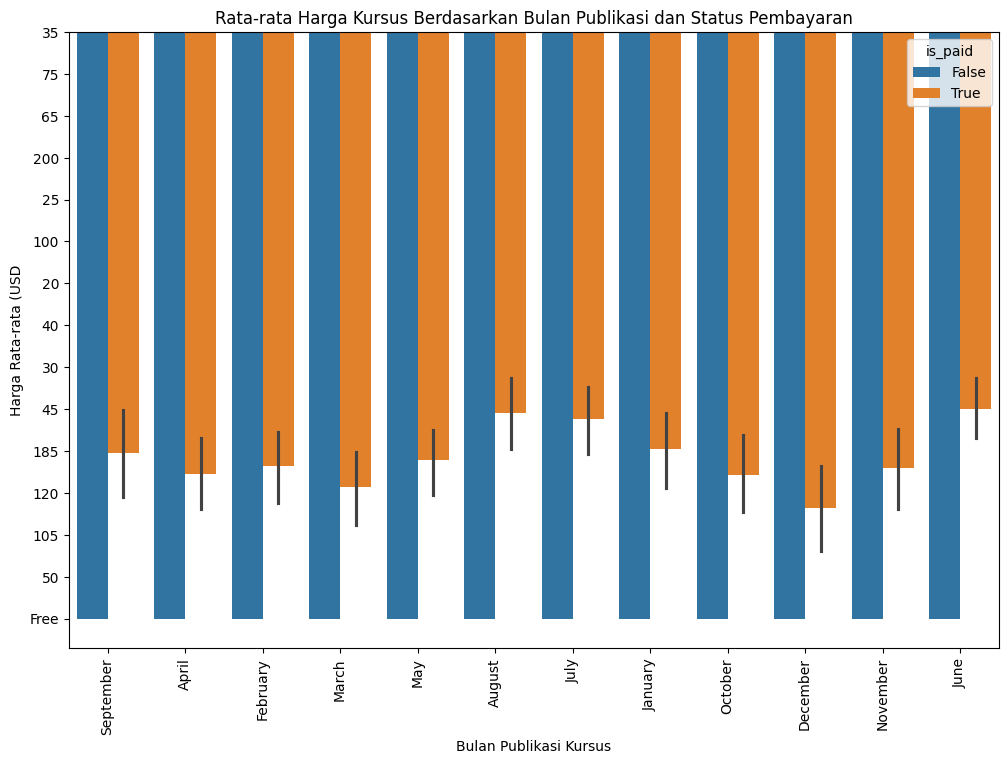

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='published_month', y='price', data=data, hue='is_paid')
plt.title('Rata-rata Harga Kursus Berdasarkan Bulan Publikasi dan Status Pembayaran')
plt.xlabel('Bulan Publikasi Kursus')
plt.ylabel('Harga Rata-rata (USD')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Langkah 7

In [ ]:
data['price'] = data['price'].replace('Free', 0)
data['price'] = pd.to_numeric(data['price'], errors='coerce').fillna(0)


In [ ]:
data2 = data.dropna(subset=['price', 'num_subscribers'])


In [ ]:
def week_function(row):
    if row['price'] == 0 and row['num_subscribers'] > 0:
        return 'free_course_with_students'
    elif row['price'] > 0 and row['num_subscribers'] == 0:
        return 'paid_course_no_students'
    elif row['price'] > 0 and row['num_subscribers'] > 0:
        return 'active_paid_course'
    else:
        return 'inactive_or_empty'

data2['weekend_or_weekday'] = data2.apply(week_function, axis=1)


In [ ]:
data2['arrival_date_month'] = pd.to_datetime(data2['published_timestamp'], errors='coerce').dt.month_name()


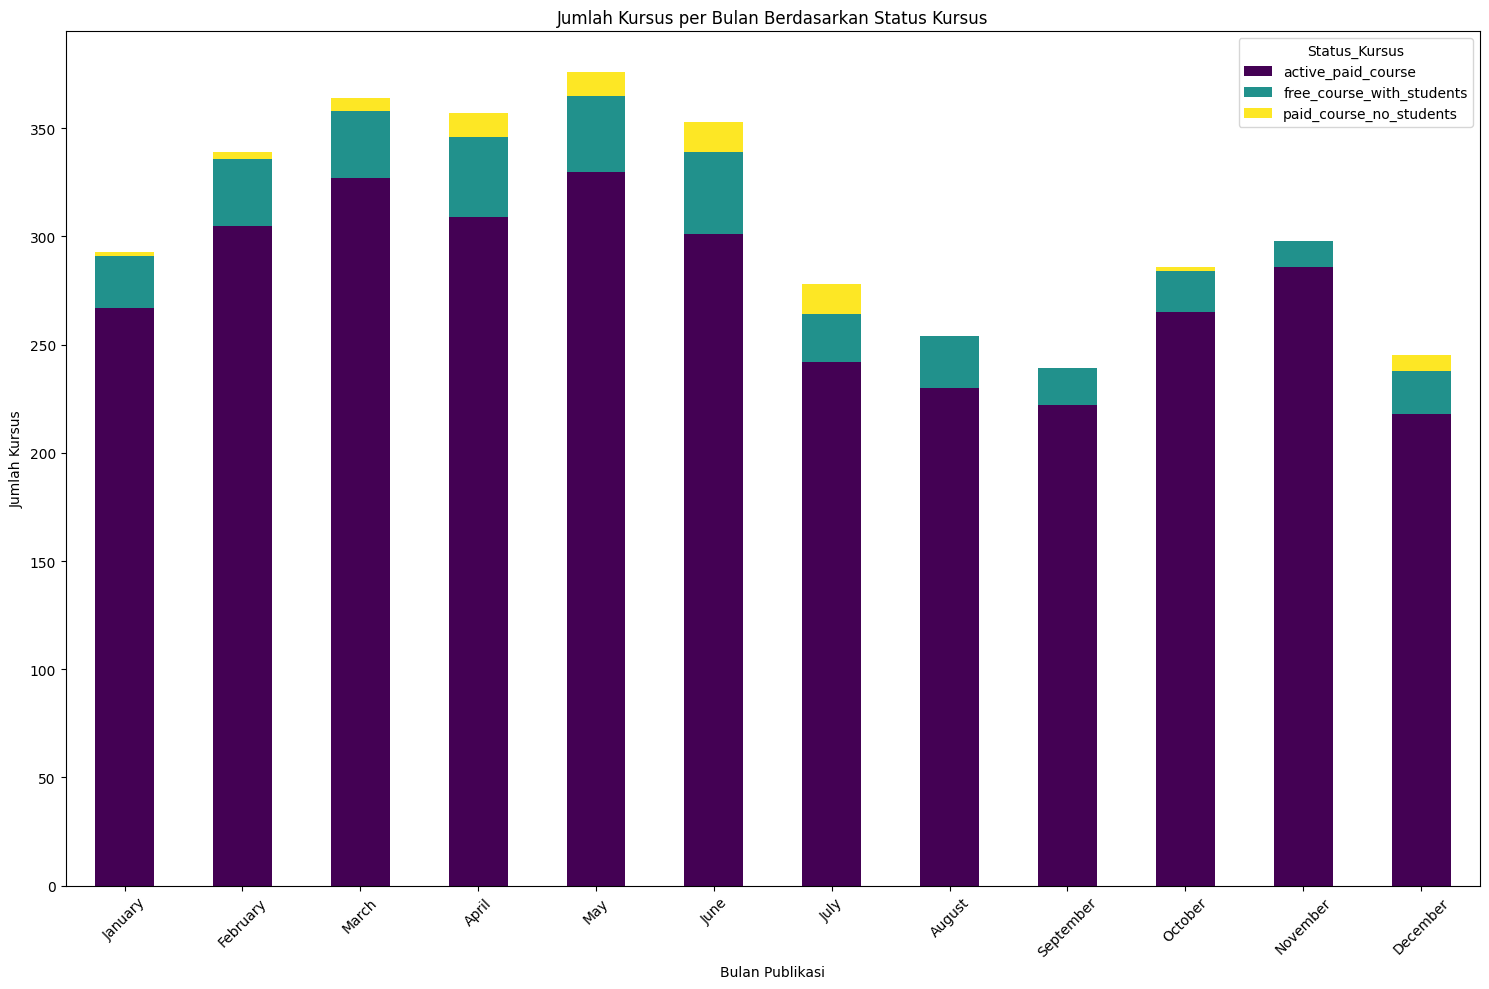

In [ ]:
group_data = data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

sorted_data = sd.Sort_Dataframeby_Month(group_data, 'arrival_date_month')
sorted_data.set_index('arrival_date_month', inplace=True)

sorted_data.plot(kind='bar', stacked=True, figsize=(15,10), colormap='viridis')
plt.title('Jumlah Kursus per Bulan Berdasarkan Status Kursus')
plt.xlabel('Bulan Publikasi')
plt.ylabel('Jumlah Kursus')
plt.xticks(rotation=45)
plt.legend(title='Status_Kursus')
plt.tight_layout()
plt.show()


In [ ]:
# Langkah 8

In [ ]:
data2['is_popular_paid'] = data2.apply(
    lambda row: 1 if (row['price'] > 0) and (row['num_subscribers'] > 1000) else 0,
    axis=1
)


In [ ]:
data2['total_customer'] = data2['num_subscribers'] + data2['num_reviews'] + data2['num_lectures']

data2['total_nights'] = data2['content_duration'] * data2['num_subscribers']


In [ ]:
dict1 = {'Free': 0, 'Paid': 1}
data2['is_paid'] = data2['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

data2['deposit_given'] = data2['is_paid'].map(dict1)


In [ ]:
data2.drop(columns=[], axis=1, inplace=True)

In [ ]:
# Langkah 9

In [ ]:
cate_features = [col for col in data.columns if data[col].dtype=='object']
num_features=[col for col in data.columns if data[col].dtype!='object']

In [ ]:
cate_features = ['subject', 'level', 'is_paid', 'weekend_or_weekday']

In [ ]:
data2['is_active'] = data2['weekend_or_weekday'].apply(lambda x: 1 if x == 'active_paid_course' else 0)

In [ ]:
data_cat = data2[cate_features].copy()
data_cat['is_active'] = data2['is_active']

In [ ]:
for col in data_cat.columns:
    if col != 'is_active': # Exclude the target variable if present
        dict2 = data_cat.groupby([col])['is_active'].mean().to_dict()
        data_cat[col] = data_cat[col].map(dict2)

In [ ]:
# Langkah 10

In [ ]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)
dataframe.columns

Index(['subject', 'level', 'is_paid', 'weekend_or_weekday', 'is_active',
       'course_id', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'published_timestamp'],
      dtype='object')

In [ ]:
dataframe.drop(['is_active'],axis=1,inplace=True)

<Axes: xlabel='price', ylabel='Density'>

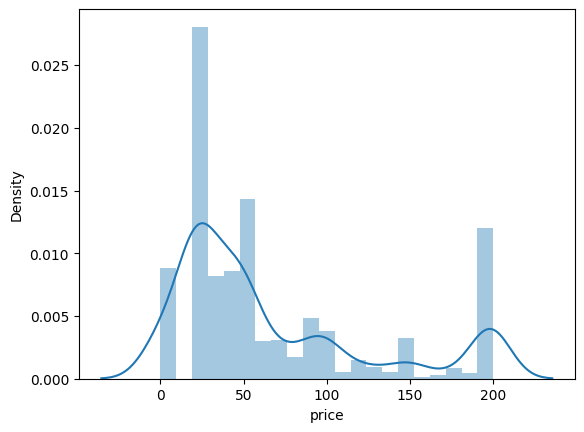

In [ ]:
sns.distplot(dataframe['price'])

In [ ]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

handle_outlier('price')
handle_outlier('num_subscribers')

In [ ]:
dataframe.dropna(inplace=True)

<Axes: xlabel='price', ylabel='Density'>

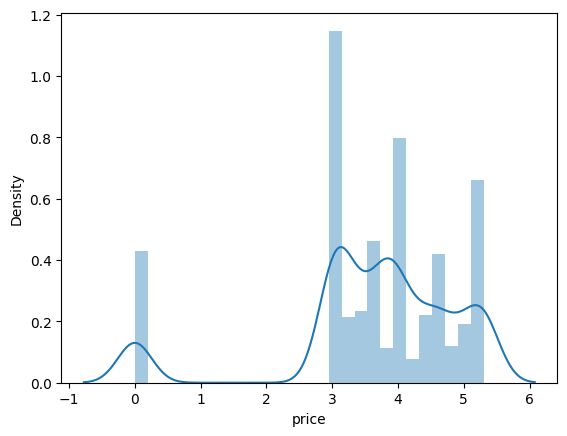

In [ ]:
sns.distplot(dataframe['price'])

<Axes: xlabel='num_subscribers', ylabel='Density'>

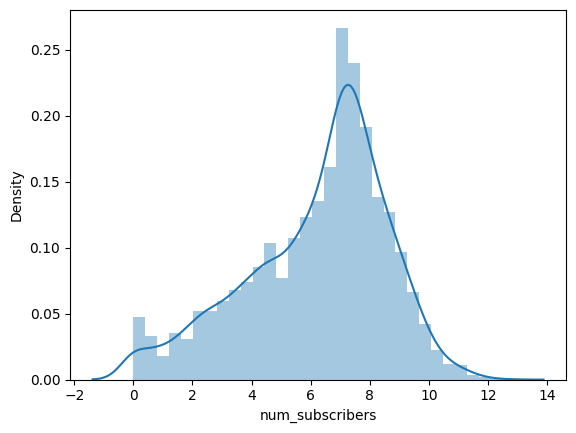

In [ ]:
sns.distplot(dataframe['num_subscribers'])

In [ ]:
# Langkah 11 dan 12

In [ ]:
# Removed the code causing the error. If you want to plot a different column, please specify the column to use.

In [ ]:
data2.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'published_month',
       'weekend_or_weekday', 'arrival_date_month', 'is_popular_paid',
       'total_customer', 'total_nights', 'deposit_given', 'is_active'],
      dtype='object')

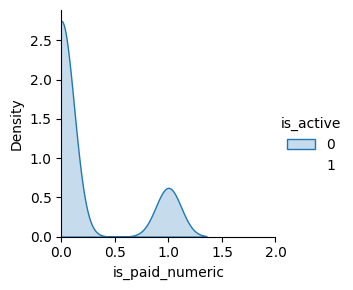

In [ ]:
data2['is_paid_numeric'] = data2['is_paid'].apply(lambda x: 1 if x == 'Paid' else 0)
sns.FacetGrid(data2, hue='is_active', xlim=(0, 2)).map(
    sns.kdeplot, 'is_paid_numeric', shade=True
).add_legend()

In [ ]:
corr = dataframe.select_dtypes(include=np.number).corr()

In [ ]:
corr['subject'].sort_values(ascending=False)

,subject
subject,1.000000
is_paid,0.049567
weekend_or_weekday,0.040645
course_id,-0.002653
price,-0.047676
num_lectures,-0.048333
num_reviews,-0.068974
level,-0.130585
num_subscribers,-0.284673


In [ ]:
corr

,subject,level,is_paid,weekend_or_weekday,course_id,price,num_subscribers,num_reviews,num_lectures
subject,1.000000,-0.130585,0.049567,0.040645,-0.002653,-0.047676,-0.284673,-0.068974,-0.048333
level,-0.130585,1.000000,0.108855,0.122025,-0.052360,0.157327,0.033435,0.041046,0.098030
is_paid,0.049567,0.108855,1.000000,0.893787,-0.013091,0.828112,-0.283118,-0.087519,0.112267
weekend_or_weekday,0.040645,0.122025,0.893787,1.000000,-0.074901,0.758742,-0.095097,-0.069447,0.135980
course_id,-0.002653,-0.052360,-0.013091,-0.074901,1.000000,0.077975,-0.206662,-0.058760,-0.026080
price,-0.047676,0.157327,0.828112,0.758742,0.077975,1.000000,-0.087127,0.002932,0.264634
num_subscribers,-0.284673,0.033435,-0.283118,-0.095097,-0.206662,-0.087127,1.000000,0.246074,0.195724
num_reviews,-0.068974,0.041046,-0.087519,-0.069447,-0.058760,0.002932,0.246074,1.000000,0.243083
num_lectures,-0.048333,0.098030,0.112267,0.135980,-0.026080,0.264634,0.195724,0.243083,1.000000


In [ ]:
corr['subject'].sort_values(ascending=False).index

Index(['subject', 'is_paid', 'weekend_or_weekday', 'course_id', 'price',
       'num_lectures', 'num_reviews', 'level', 'num_subscribers'],
      dtype='object')

In [ ]:
features_to_drop=['course_id',
    'published_timestamp',
    ]

In [ ]:
df.drop(features_to_drop,axis=1,inplace=True)

In [ ]:
dataframe.shape

(3682, 11)

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
x=dataframe.drop('subject',axis=1)

In [ ]:
y=dataframe['subject']

In [ ]:
x.columns

Index(['level', 'is_paid', 'weekend_or_weekday', 'course_id', 'is_paid',
       'price', 'num_subscribers', 'num_reviews', 'num_lectures',
       'published_timestamp'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy data biar aman
x_fixed = x.copy()

# Label encoding untuk kolom bertipe objek (string)
for col in x_fixed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    x_fixed[col] = le.fit_transform(x_fixed[col].astype(str))


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'y'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Latih model seleksi HANYA pada data latih
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x_fixed.drop(['course_title', 'published_timestamp'], axis=1, errors='ignore'), y_encoded)

# Dapatkan fitur yang terpilih
cols=x_fixed.drop(['course_title', 'published_timestamp'], axis=1, errors='ignore').columns
selected_feat = cols[feature_sel_model.get_support()]
selected_feat

Index(['level', 'weekend_or_weekday', 'price', 'num_subscribers',
       'num_lectures'],
      dtype='object')

In [ ]:
x = x[selected_feat]
x.columns

Index(['level', 'weekend_or_weekday', 'price', 'num_subscribers',
       'num_lectures'],
      dtype='object')

In [ ]:
# Langkah 13

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Langkah 14

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ensure 'price' is numeric in x
x['price'] = x['price'].replace('Free', 0)
x['price'] = pd.to_numeric(x['price'], errors='coerce').fillna(0)

# Encode the target variable 'y'
le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split( x, y_encoded, test_size=0.25, random_state=42)
X_train.shape

(2761, 5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Encode the 'level' column in x if not already encoded
if x['level'].dtype == 'object':
    le_level = LabelEncoder()
    x['level'] = le_level.fit_transform(x['level'])

# Encode the target variable 'y' if not already encoded
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)


score = cross_val_score(logreg, x, y_encoded, cv=10)
score.mean()

np.float64(0.4619800871921763)

In [ ]:
# Langkah 15

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

for name,model in models:
    print(name)
    model.fit(X_train,y_train)

    predictions=model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)

    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[185  79  99 120]
 [108 216  50  43]
 [  0   0   0   0]
 [  7   1   7   6]]
0.44191096634093374


LogisticRegression
[[185  79  99 120]
 [108 216  50  43]
 [  0   0   0   0]
 [  7   1   7   6]]
0.44191096634093374


Naive_bayes
[[146  74  69  71]
 [109 213  52  43]
 [ 13   5  10   6]
 [ 32   4  25  49]]
0.4538545059717698


Random Forest
[[144  58  55  61]
 [ 74 211  42  34]
 [ 38  15  31  15]
 [ 44  12  28  59]]
0.4831704668838219


Decision_tree
[[124  66  50  62]
 [ 60 156  28  31]
 [ 64  45  45  30]
 [ 52  29  33  46]]
0.4028230184581976


KNN
[[145  81  68  83]
 [ 96 193  41  38]
 [ 28  12  23  12]
 [ 31  10  24  36]]
0.43105320304017375


